## Problem 1

C:\Users\amoka\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


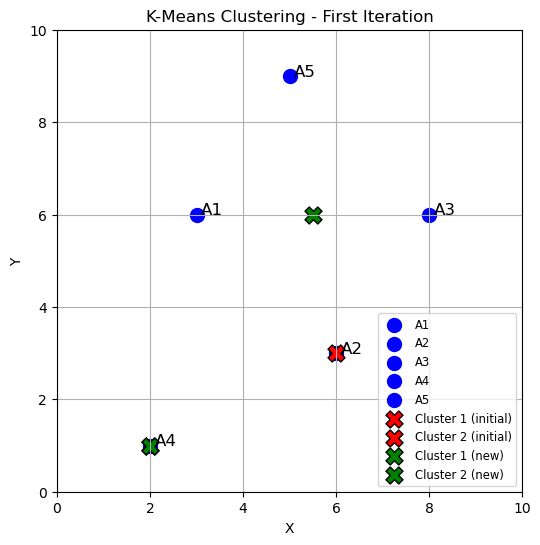

silhouette = 0.20626123148444236 
WSS = 31.0


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# Points
points = {
    "A1": (3, 6),
    "A2": (6, 3),
    "A3": (8, 6),
    "A4": (2, 1),
    "A5": (5, 9)
}

# Initial and new centroids
initial_centroids = {"Cluster 1": points["A2"], "Cluster 2": points["A4"]}
new_centroids = {"Cluster 1": (5.5, 6), "Cluster 2": (2, 1)}

# Plotting
plt.figure(figsize=(6, 6))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)

# Plot each point
for label, (x, y) in points.items():
    plt.scatter(x, y, color='blue', s=100, label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x + 0.1, y, label, fontsize=12)

# Plot initial centroids
for label, (x, y) in initial_centroids.items():
    plt.scatter(x, y, color='red', s=150, edgecolor='black', marker='X', label=label + " (initial)" if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot new centroids
for label, (x, y) in new_centroids.items():
    plt.scatter(x, y, color='green', s=150, edgecolor='black', marker='X', label=label + " (new)" if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering - First Iteration")
plt.legend(loc='lower right' , fontsize='small')
plt.show()
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Points and clusters
data_points = np.array([points["A1"], points["A2"], points["A3"], points["A4"], points["A5"]])
labels = np.array([0, 0, 0, 1, 0])  # Cluster assignments after first iteration
centroids = np.array([new_centroids["Cluster 1"], new_centroids["Cluster 2"]])

# Silhouette Score
silhouette = silhouette_score(data_points, labels, metric='euclidean')

# WSS Score
# Calculate WSS as the sum of squared distances from each point to its assigned centroid
wss = sum(np.min(cdist(data_points, centroids, 'euclidean') ** 2, axis=1))



print(f'silhouette = {silhouette} \nWSS = {wss}')


################################   END OF QUESTION 1    ################################

## Problem 2

(7255, 11) (7255,) (2460, 11) (2460,)
    Latitude  Longitude  Day  Hour  Minute  Duration  RemainingTime  \
0  45.442142 -75.303369    1     4      13        40             40   
1  45.442154 -75.304366    1     4      23        40             30   
2  45.442104 -75.303963    1     4      33        40             20   
3  45.441868 -75.303577    1     4      43        40             10   
4  45.447727 -75.147722    2    15      49        30             30   

   Resources  Coverage  OnPeakHours  GridNumber  
0          9        91            0      131380  
1          9        91            0      131380  
2          9        91            0      121996  
3          9        91            0      121996  
4          5        47            0      140784  


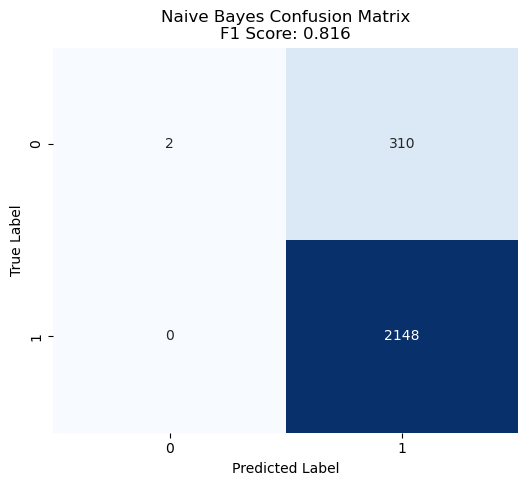

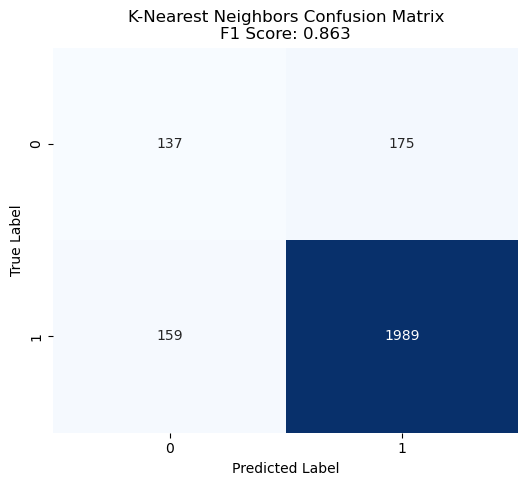

0.8626930606528993 0.8160189298583262


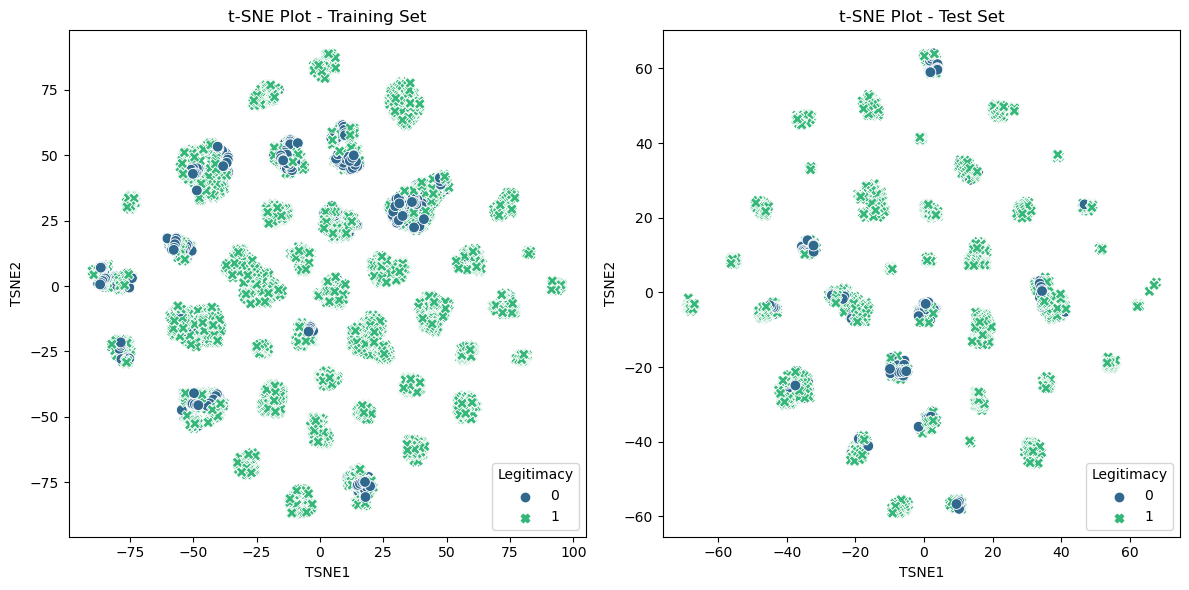

In [5]:
# Load the dataset
data = pd.read_csv('Datasets/MCSDatasetNEXTCONLab.csv')

# Define feature columns and target column
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'  # Corrected spelling based on the dataset

# Split dataset into training and test sets based on the 'Day' column
# Training data includes Day values 0, 1, 2, while testing data includes Day value 3
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]

# Separate features and target for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

#Display shapes of the resulting datasets to confirm splits
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.head())


# Import necessary libraries for classifiers and evaluation metrics
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'path_to_your_file/MCSDatasetNEXTCONLab (1).csv'  # Update this path to your dataset location
data = pd.read_csv('Datasets/MCSDatasetNEXTCONLab.csv')

# Define feature columns and target column
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'  # Corrected spelling based on the dataset

# Split dataset into training and test sets based on the 'Day' column
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]

# Separate features and target for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize classifiers
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train and predict with Naive Bayes
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

# Train and predict with K-Nearest Neighbors
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

# Calculate confusion matrices and F1 scores for both classifiers
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
nb_f1_score = f1_score(y_test, nb_y_pred, average='weighted')

knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred, average='weighted')

# Function to plot confusion matrix with F1 score
def plot_confusion_matrix(conf_matrix, f1, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{title}\nF1 Score: {f1:.3f}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()  # Ensure plt.show() is called within the function

# Plot for Naive Bayes
plot_confusion_matrix(nb_conf_matrix, nb_f1_score, "Naive Bayes Confusion Matrix")

# Plot for K-Nearest Neighbors
plot_confusion_matrix(knn_conf_matrix, knn_f1_score, "K-Nearest Neighbors Confusion Matrix")


print(knn_f1_score, nb_f1_score)


# Import t-SNE from sklearn for dimensionality reduction
from sklearn.manifold import TSNE

# Perform t-SNE for visualization with a random state for reproducibility
tsne = TSNE(n_components=2, random_state=0)

# Apply t-SNE on the training set
X_train_tsne = tsne.fit_transform(X_train)
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
train_tsne_df['Label'] = y_train.values

# Apply t-SNE on the test set
X_test_tsne = tsne.fit_transform(X_test)
test_tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE1', 'TSNE2'])
test_tsne_df['Label'] = y_test.values

# Plotting t-SNE for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Training Set")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

# Plotting t-SNE for test set
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Test Set")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

plt.tight_layout()
plt.show()

## Problem 3

77/77 [==============================] - 0s 698us/step


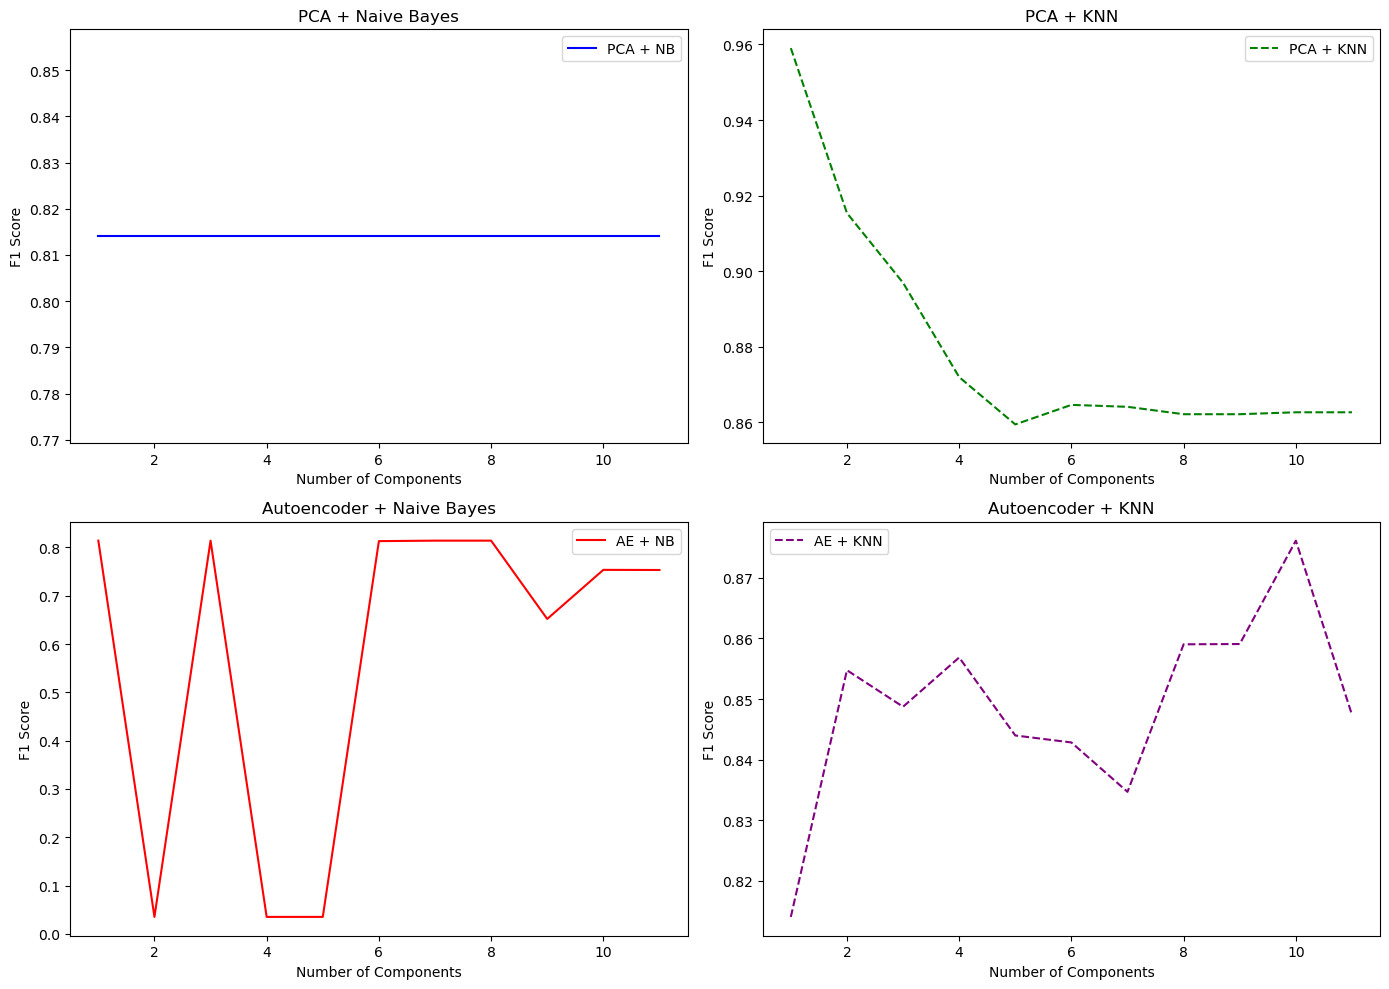

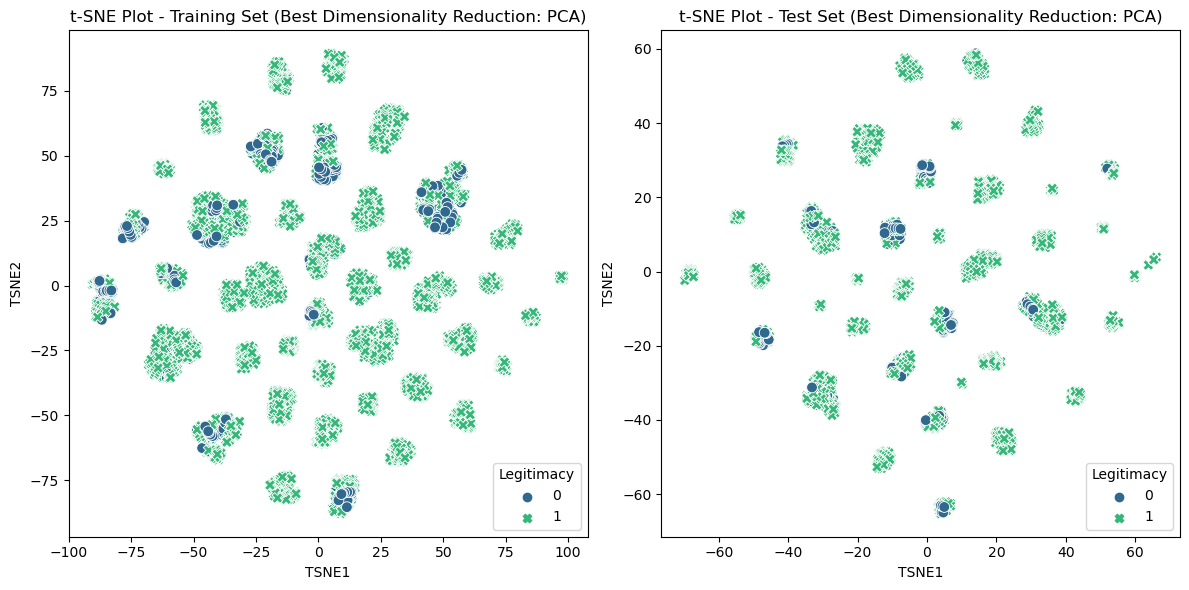

In [10]:
########################### PART 3 #####################################


import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'
data = pd.read_csv(file_path)

# Define features and target
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'  # Corrected based on your dataset

# Prepare train-test split based on 'Day'
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


# Function to calculate F1 score for different dimensionalities
def evaluate_with_reduction(X_train, y_train, X_test, y_test, method, classifier):
    f1_scores = []
    dimensions = range(1, len(features) + 1)  # Up to max number of features

    for dim in dimensions:
        # Dimensionality reduction
        if method == 'PCA':
            reducer = PCA(n_components=dim)
            X_train_reduced = reducer.fit_transform(X_train)
            X_test_reduced = reducer.transform(X_test)

        elif method == 'AE':
            # Define autoencoder model
            ae_model = Sequential([
                Dense(dim * 2, input_dim=len(features), activation='relu'),
                Dense(dim, activation='relu'),
                Dense(dim * 2, activation='relu'),
                Dense(len(features), activation='sigmoid')
            ])
            ae_model.compile(optimizer='adam', loss='mse')
            ae_model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=0)

            encoder = Sequential(ae_model.layers[:2])
            X_train_reduced = encoder.predict(X_train)
            X_test_reduced = encoder.predict(X_test)

        # Train classifier and calculate F1 score
        classifier.fit(X_train_reduced, y_train)
        y_pred = classifier.predict(X_test_reduced)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    return dimensions, f1_scores


# Evaluate and plot results for both NB and KNN classifiers with PCA and AE
plt.figure(figsize=(14, 10))

# PCA + NB
dims_pca_nb, f1_pca_nb = evaluate_with_reduction(X_train, y_train, X_test, y_test, 'PCA', GaussianNB())
plt.subplot(2, 2, 1)
plt.plot(dims_pca_nb, f1_pca_nb, label='PCA + NB', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('PCA + Naive Bayes')
plt.legend()

# PCA + KNN
dims_pca_knn, f1_pca_knn = evaluate_with_reduction(X_train, y_train, X_test, y_test, 'PCA',
                                                   KNeighborsClassifier(n_neighbors=5))
plt.subplot(2, 2, 2)
plt.plot(dims_pca_knn, f1_pca_knn, label='PCA + KNN', linestyle='--', color='g')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('PCA + KNN')
plt.legend()

# AE + NB
dims_ae_nb, f1_ae_nb = evaluate_with_reduction(X_train, y_train, X_test, y_test, 'AE', GaussianNB())
plt.subplot(2, 2, 3)
plt.plot(dims_ae_nb, f1_ae_nb, label='AE + NB', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('Autoencoder + Naive Bayes')
plt.legend()

# AE + KNN
dims_ae_knn, f1_ae_knn = evaluate_with_reduction(X_train, y_train, X_test, y_test, 'AE',
                                                 KNeighborsClassifier(n_neighbors=5))
plt.subplot(2, 2, 4)
plt.plot(dims_ae_knn, f1_ae_knn, label='AE + KNN', linestyle='--', color='purple')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('Autoencoder + KNN')
plt.legend()

plt.tight_layout()
plt.show()


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset and prepare it as before
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'
data = pd.read_csv(file_path)
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'

train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Assuming PCA was the best-performing technique with optimal components, let's reduce the data first
# For this example, let's assume the optimal PCA components were 5
pca = PCA(n_components=5)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Perform t-SNE on the reduced data
tsne = TSNE(n_components=2, random_state=0, learning_rate='auto', init='pca')

# Apply t-SNE on the training and test set reduced data
X_train_tsne = tsne.fit_transform(X_train_reduced)
X_test_tsne = tsne.fit_transform(X_test_reduced)

# Create dataframes for easy plotting
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
train_tsne_df['Label'] = y_train.values

test_tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE1', 'TSNE2'])
test_tsne_df['Label'] = y_test.values

# Plot t-SNE for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Training Set (Best Dimensionality Reduction: PCA)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

# Plot t-SNE for the test set
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Test Set (Best Dimensionality Reduction: PCA)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

plt.tight_layout()
plt.show()

## Problem 4

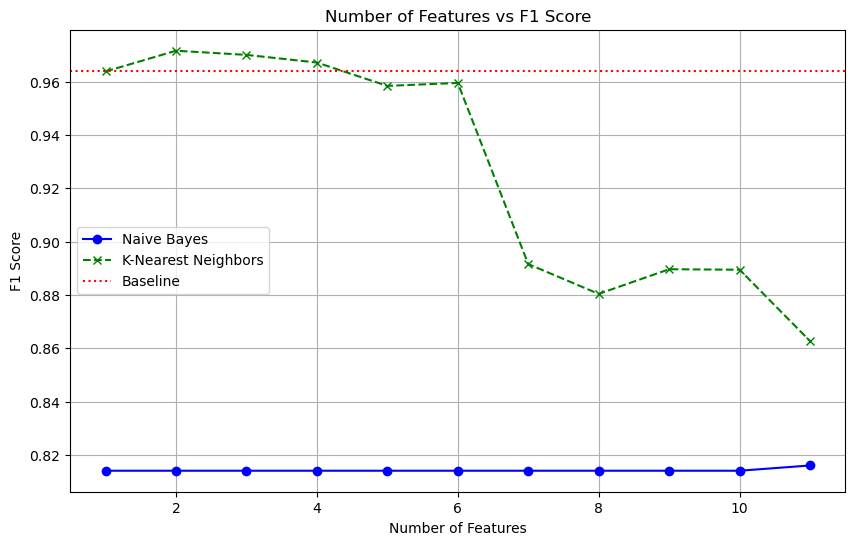

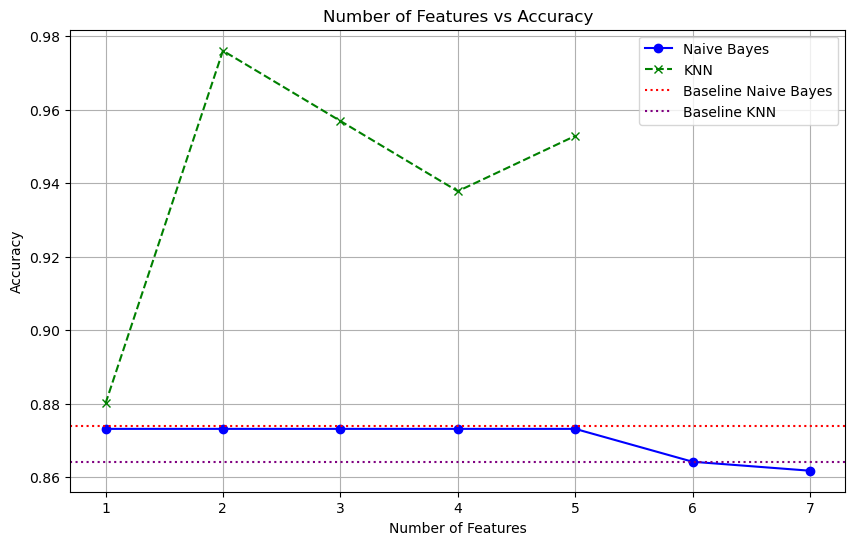

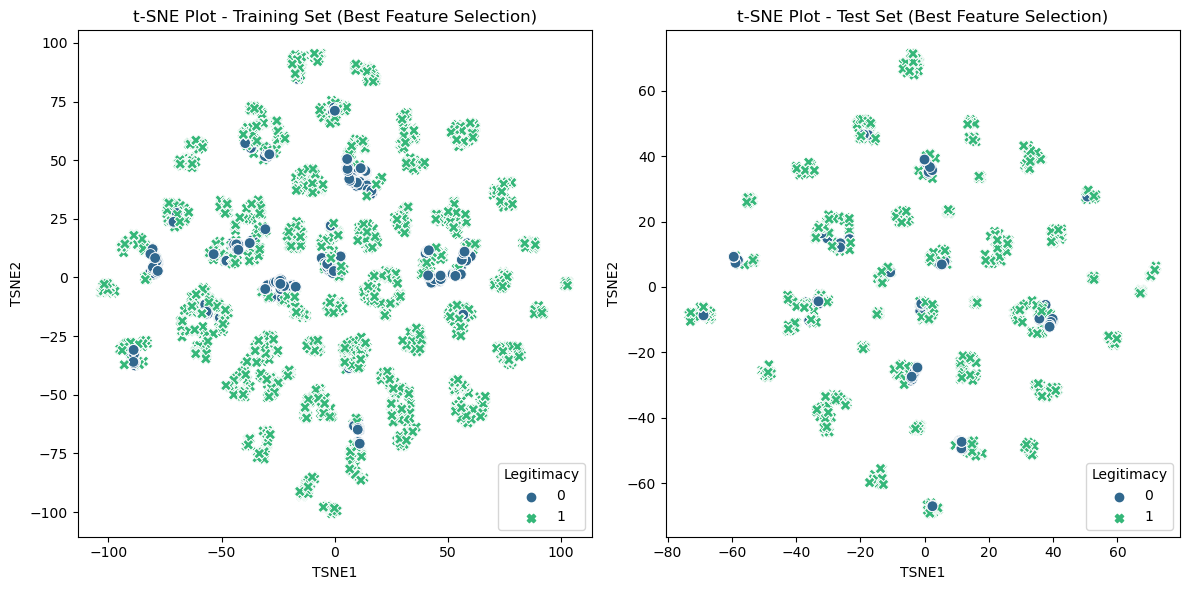

In [8]:
########################### Problem 4 #####################################

import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load the dataset and prepare it as before
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'  # Update with correct path
data = pd.read_csv(file_path)
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'

train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Filter Method: Information Gain
info_gain_scores = mutual_info_classif(X_train, y_train)

# Rank features by their information gain
sorted_indices = np.argsort(info_gain_scores)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_scores = [info_gain_scores[i] for i in sorted_indices]

# Iteratively add features and evaluate performance
f1_scores_nb = []
f1_scores_knn = []
num_features = list(range(1, len(features) + 1))

for n in num_features:
    selected_features = sorted_features[:n]
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Naive Bayes Classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_subset, y_train)
    nb_y_pred = nb_classifier.predict(X_test_subset)
    f1_nb = f1_score(y_test, nb_y_pred, average='weighted')
    f1_scores_nb.append(f1_nb)

    # K-Nearest Neighbors Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_subset, y_train)
    knn_y_pred = knn_classifier.predict(X_test_subset)
    f1_knn = f1_score(y_test, knn_y_pred, average='weighted')
    f1_scores_knn.append(f1_knn)

# Plot number of features vs F1 score
plt.figure(figsize=(10, 6))
plt.plot(num_features, f1_scores_nb, label='Naive Bayes', linestyle='-', marker='o', color='blue')
plt.plot(num_features, f1_scores_knn, label='K-Nearest Neighbors', linestyle='--', marker='x', color='green')
plt.axhline(y=max(f1_scores_nb[0], f1_scores_knn[0]), color='red', linestyle=':', label='Baseline')
plt.title('Number of Features vs F1 Score')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


################ Part 2

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

# Load the dataset and prepare it as before
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'  # Update with correct path
data = pd.read_csv(file_path)
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'

# Split dataset based on 'Day'
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize classifiers
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Apply Forward Selection using Naive Bayes
sfs_nb = SFS(nb_classifier,
             k_features='best',  # Keep adding features until all are selected
             forward=True,
             floating=False,
             scoring='accuracy',
             cv=0)  # No cross-validation for simplicity
sfs_nb = sfs_nb.fit(X_train, y_train)

# Extract selected features and their accuracies for Naive Bayes
nb_selected_features = list(sfs_nb.k_feature_names_)
nb_accuracy_scores = []
for i in range(1, len(nb_selected_features) + 1):
    selected_subset = nb_selected_features[:i]
    nb_classifier.fit(X_train[selected_subset], y_train)
    nb_accuracy_scores.append(accuracy_score(y_test, nb_classifier.predict(X_test[selected_subset])))

# Apply Forward Selection using KNN
sfs_knn = SFS(knn_classifier,
              k_features='best',
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=0)
sfs_knn = sfs_knn.fit(X_train, y_train)

# Extract selected features and their accuracies for KNN
knn_selected_features = list(sfs_knn.k_feature_names_)
knn_accuracy_scores = []
for i in range(1, len(knn_selected_features) + 1):
    selected_subset = knn_selected_features[:i]
    knn_classifier.fit(X_train[selected_subset], y_train)
    knn_accuracy_scores.append(accuracy_score(y_test, knn_classifier.predict(X_test[selected_subset])))

# Baseline accuracies with all features
nb_classifier.fit(X_train, y_train)
baseline_accuracy_nb = accuracy_score(y_test, nb_classifier.predict(X_test))

knn_classifier.fit(X_train, y_train)
baseline_accuracy_knn = accuracy_score(y_test, knn_classifier.predict(X_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(nb_accuracy_scores) + 1), nb_accuracy_scores, label='Naive Bayes', linestyle='-', marker='o', color='blue')
plt.plot(range(1, len(knn_accuracy_scores) + 1), knn_accuracy_scores, label='KNN', linestyle='--', marker='x', color='green')
plt.axhline(y=baseline_accuracy_nb, color='red', linestyle=':', label='Baseline Naive Bayes')
plt.axhline(y=baseline_accuracy_knn, color='purple', linestyle=':', label='Baseline KNN')
plt.title('Number of Features vs Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

####################   PART3

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define features and target
features = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
            'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
target = 'Ligitimacy'

# Split dataset based on 'Day' column
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Feature Selection: Information Gain (mutual information)
info_gain_scores = mutual_info_classif(X_train, y_train)
sorted_indices = np.argsort(info_gain_scores)[::-1]
sorted_features = [features[i] for i in sorted_indices]

# Select the top N features (based on analysis or an arbitrary number, e.g., top 5)
top_n_features = 5
best_features = sorted_features[:top_n_features]

# Reduce the datasets to the selected features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Apply t-SNE on the reduced feature sets
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='pca')

# Perform t-SNE on training data
X_train_tsne = tsne.fit_transform(X_train_best)
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
train_tsne_df['Label'] = y_train.values

# Perform t-SNE on test data
X_test_tsne = tsne.fit_transform(X_test_best)
test_tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE1', 'TSNE2'])
test_tsne_df['Label'] = y_test.values

# Plot t-SNE for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Training Set (Best Feature Selection)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

# Plot t-SNE for the test set
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_tsne_df, x='TSNE1', y='TSNE2', hue='Label', style='Label', palette='viridis', s=60)
plt.title("t-SNE Plot - Test Set (Best Feature Selection)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Legitimacy", loc='lower right')

plt.tight_layout()
plt.show()

## Problem 5

In [11]:
########################################### Problem 5  ########################################
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Extract latitude, longitude, and legitimacy for clustering
lat_lon_features = data[['Latitude', 'Longitude']]
legitimacy = data['Ligitimacy']

# Define range of cluster numbers to evaluate
cluster_range = range(2, 11)  # Evaluate from 2 to 10 clusters
legitimate_counts_per_cluster = []

# Perform K-means clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(lat_lon_features)

    # Count the legitimate members in each cluster
    legitimate_count = data[data['Ligitimacy'] == 1].groupby('Cluster').size().sum()
    legitimate_counts_per_cluster.append(legitimate_count)

# Plot number of clusters vs legitimate members in clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, legitimate_counts_per_cluster, marker='o', linestyle='-', color='blue',
         label='Legitimate Members')
plt.title("Number of Clusters vs Legitimate Members in Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Number of Legitimate Members")
plt.grid(True)
plt.legend()
plt.show()
#### Q2_Part 5

import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv' # Replace with the correct file path
data = pd.read_csv(file_path)

# Extract latitude, longitude, and legitimacy for clustering
lat_lon_features = data[['Latitude', 'Longitude']].values
legitimacy = data['Ligitimacy']

# Define the range of cluster sizes for SOFM (different grid sizes)
cluster_sizes = range(2, 11)
legitimate_only_counts = []

# Perform SOFM clustering for each grid size
for grid_size in cluster_sizes:
    # Initialize SOFM with the desired grid size
    som = MiniSom(x=grid_size, y=1, input_len=2, sigma=1.0, learning_rate=0.5)
    som.random_weights_init(lat_lon_features)
    som.train_random(lat_lon_features, 100)  # Train with 100 iterations

    # Assign each data point to a cluster based on SOFM
    clusters = {}
    for idx, point in enumerate(lat_lon_features):
        winner = som.winner(point)  # Find the best matching unit
        cluster_id = winner[0]  # Use x-coordinate as cluster ID in this 1D map
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(idx)

    # Count legitimate-only clusters
    legitimate_only_count = 0
    for cluster_id, indices in clusters.items():
        # Check if all members in the cluster are legitimate
        if all(legitimacy.iloc[i] == 1 for i in indices):
            legitimate_only_count += 1
    legitimate_only_counts.append(legitimate_only_count)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(cluster_sizes, legitimate_only_counts, marker='o', linestyle='-', color='blue', label='Legitimate-Only Clusters')
plt.title("Number of Clusters (SOFM) vs Legitimate-Only Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Number of Legitimate-Only Clusters")
plt.grid(True)
plt.legend()
plt.show()


###########PART C
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/MCSDatasetNEXTCONLab.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Extract latitude and longitude features for clustering
lat_lon_features = data[['Latitude', 'Longitude']].values

# Set initial DBSCAN parameters
epsilon = 0.01  # Initial guess for epsilon (adjust based on data scale)
min_pts = 10    # Initial guess for MinPts (typical values are 5-20)

# Apply DBSCAN with chosen epsilon and MinPts values
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
data['Cluster'] = dbscan.fit_predict(lat_lon_features)

# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(data['Cluster'])) - (1 if -1 in data['Cluster'].values else 0)

# Output results
print(f"DBSCAN Clustering with epsilon={epsilon} and min_pts={min_pts}")
print(f"Number of clusters found: {num_clusters}")

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Latitude'], data['Longitude'], c=data['Cluster'], cmap='viridis', marker='o', s=50)
plt.title(f"DBSCAN Clustering with epsilon={epsilon} and min_pts={min_pts}")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py)